# Charger le jeu de données

In [2]:
from sklearn.datasets import fetch_olivetti_faces

In [3]:
def load_data():
    olivetti = fetch_olivetti_faces()
    # charger le jeux de données
    return olivetti

In [4]:
dataset = load_data()

In [5]:
type(dataset)

sklearn.utils.Bunch

#### Note :
Bunch objects are sometimes used as an output for functions and methods. They extend dictionaries by enabling values to be accessed by key, bunch["value_key"], or by an attribute, bunch.value_key.

Ref:https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html

In [6]:
print(dataset.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [7]:
dataset.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

# Diviser le jeux de données en ensemble d'apprentissage (trainingset) et de test(testingset)

## Approche 1

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.33, random_state=42)
#Ref : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Approche 2

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt

sss = StratifiedShuffleSplit()
sss.get_n_splits(dataset.data, dataset.target)

for train_index, test_index in sss.split(dataset.data, dataset.target):
        #print("TRAIN:", train_index, "TEST:", test_index)
        x_train_valid, X_test = dataset.data[train_index], dataset.data[test_index]
        y_train_valid, y_test = dataset.target[train_index], dataset.target[test_index]
# a faire

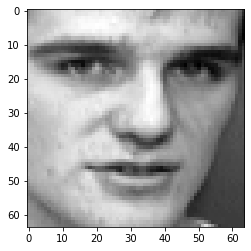

In [10]:
plt.imshow(x_train_valid[4].reshape(-1, 64), cmap="gray")

# Equalisation d'histogrammes

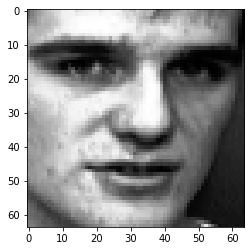

In [11]:
from skimage import exposure
image = x_train_valid[4].reshape(-1, 64)
gamma_corrected = exposure.equalize_hist(image)
plt.imshow(gamma_corrected, cmap="gray")

In [12]:
# à faire

# Compresser les images grace à une ACP

In [13]:
from sklearn.decomposition import PCA
import numpy as np

In [14]:
# a faire

In [15]:
#pca = PCA(variance_rate)
pca = PCA(0.8)

X_train_pca = pca.fit_transform(X_train)
#print(X_train_pca)

X_valid = x_train_valid
X_valid_pca = pca.transform(X_valid)
print(X_valid_pca)

X_test_pca = pca.transform(X_test)
print(X_test_pca)

[[ 8.7880735e+00  1.6205645e+00 -1.9107341e+00 ...  3.9685369e-02
   6.4559454e-01  3.6395818e-01]
 [ 1.5001440e+00  3.5991583e+00  2.5305300e+00 ... -8.8889062e-02
  -1.2511081e-01 -1.1630614e+00]
 [ 1.5983170e+00 -1.1468147e+00  3.9634466e+00 ...  5.3128415e-01
   3.9274931e-01 -9.2838466e-02]
 ...
 [ 2.3731196e+00  9.2409754e+00 -5.1725435e+00 ...  4.8470497e-02
   4.5903432e-01  1.5425578e-01]
 [-6.6621971e+00  2.6120131e+00 -2.0825260e+00 ... -8.8629997e-01
   4.3708086e-03  2.7806029e-01]
 [-3.3082092e+00  8.1861467e+00 -1.4834377e+00 ...  1.1999943e+00
   6.0657668e-01 -3.5317257e-01]]
[[-0.8372166  -0.2518444   2.8007104  ... -0.12625583 -0.08559959
  -0.08601838]
 [ 4.950612   -0.61866003 -0.9401468  ...  0.6436355  -0.81351936
  -0.82349396]
 [-1.0451324  -2.3458679  -4.4238825  ... -0.3183002  -0.72000384
   0.78250027]
 ...
 [ 0.74958444  6.7145367  -4.3808465  ... -0.03037724  0.14237309
   0.5094918 ]
 [ 7.9148026  -1.2719964  -3.61312    ... -0.47565988 -1.114243
   0.29

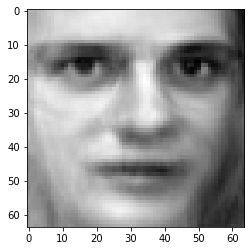

In [16]:
# a faire
final_img = pca.inverse_transform(X_valid_pca)

plt.imshow(final_img[4].reshape(-1, 64), cmap="gray")

# Classification non supervisée

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# à faire
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(X_valid_pca)
silhouette_score(kmeans_pca)

PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)


TypeError: silhouette_score() missing 1 required positional argument: 'labels'

In [18]:
best_k

NameError: name 'best_k' is not defined

In [ ]:
best_model = kmeans_per_k[best_index]

# Classficication

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

In [ ]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
    
clf.score(X_valid_reduced, y_valid)

In [ ]:
X_train_reduced.shape

In [ ]:
from sklearn.pipeline import Pipeline

for n_clusters in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=42)),
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

In [ ]:
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

In [ ]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)